## Introduction
Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not





## Objective
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
scrut_data = pd.read_csv("Fraud_check.csv")
scrut_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [3]:
scrut_data.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [4]:
scrut_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
scrut_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
scrut_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


###  EDA and data transformation

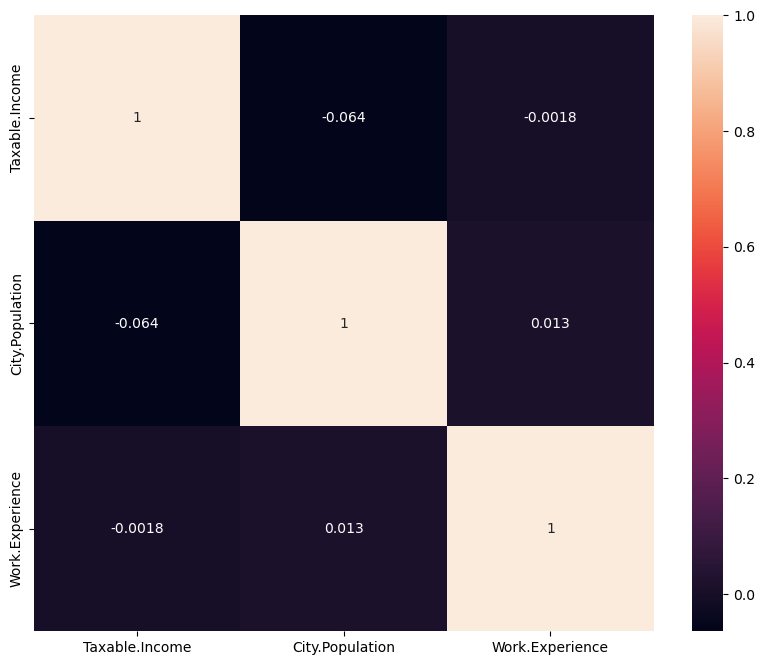

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(scrut_data.corr(numeric_only=True),annot=True)
plt.show()

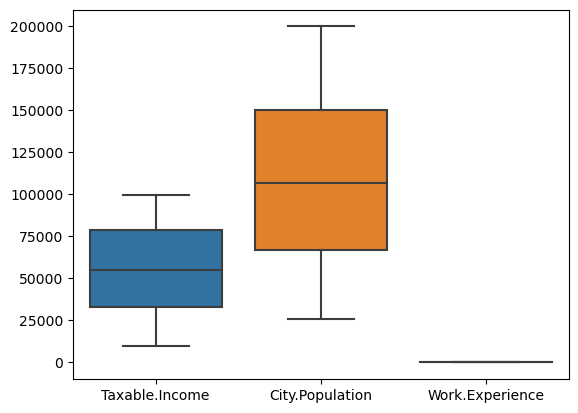

In [8]:
sns.boxplot(data=scrut_data)
plt.show()

* Countplot for data having Dtype = Object to visualize the approximate distribution of Data

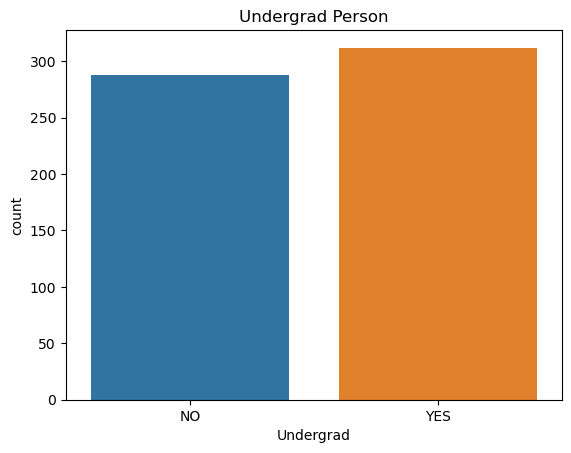

In [9]:
sns.countplot(x=scrut_data['Undergrad'])
plt.title("Undergrad Person")
plt.show()

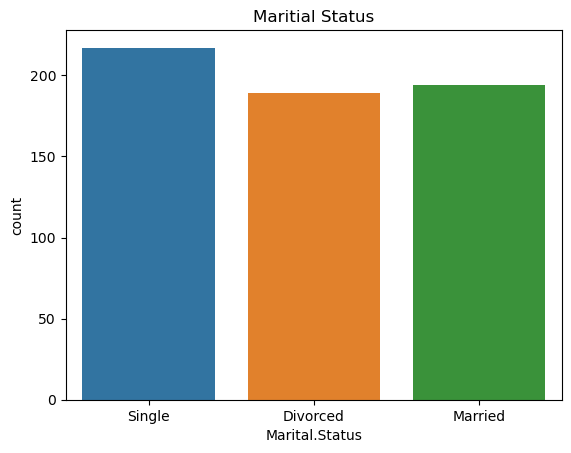

In [10]:
sns.countplot(x=scrut_data['Marital.Status'])
plt.title("Maritial Status")
plt.show()

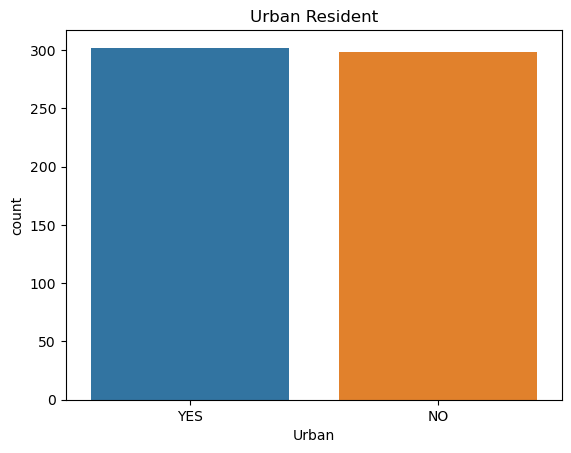

In [11]:
sns.countplot(x=scrut_data['Urban'])
plt.title("Urban Resident")
plt.show()

2. For the data having continus value first convert them in to distinct categories :- 
a. As per problem statement 'IncomeStatus' to be treated as 'Risky' if <= 30000, and 'Good' if > 30000

In [12]:
scrut_data['Tex_inc'] = pd.cut(scrut_data['Taxable.Income'], bins=[10003, 30000, 99620],
                                    labels=['Risky', 'Good'])
scrut_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tex_inc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
## Get dummy for all features having categorical Data now ('Tax_inc' dummy to be used as dependent variable)
df=pd.get_dummies(scrut_data,columns=['Undergrad','Marital.Status','Urban','Tex_inc'], drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tex_inc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


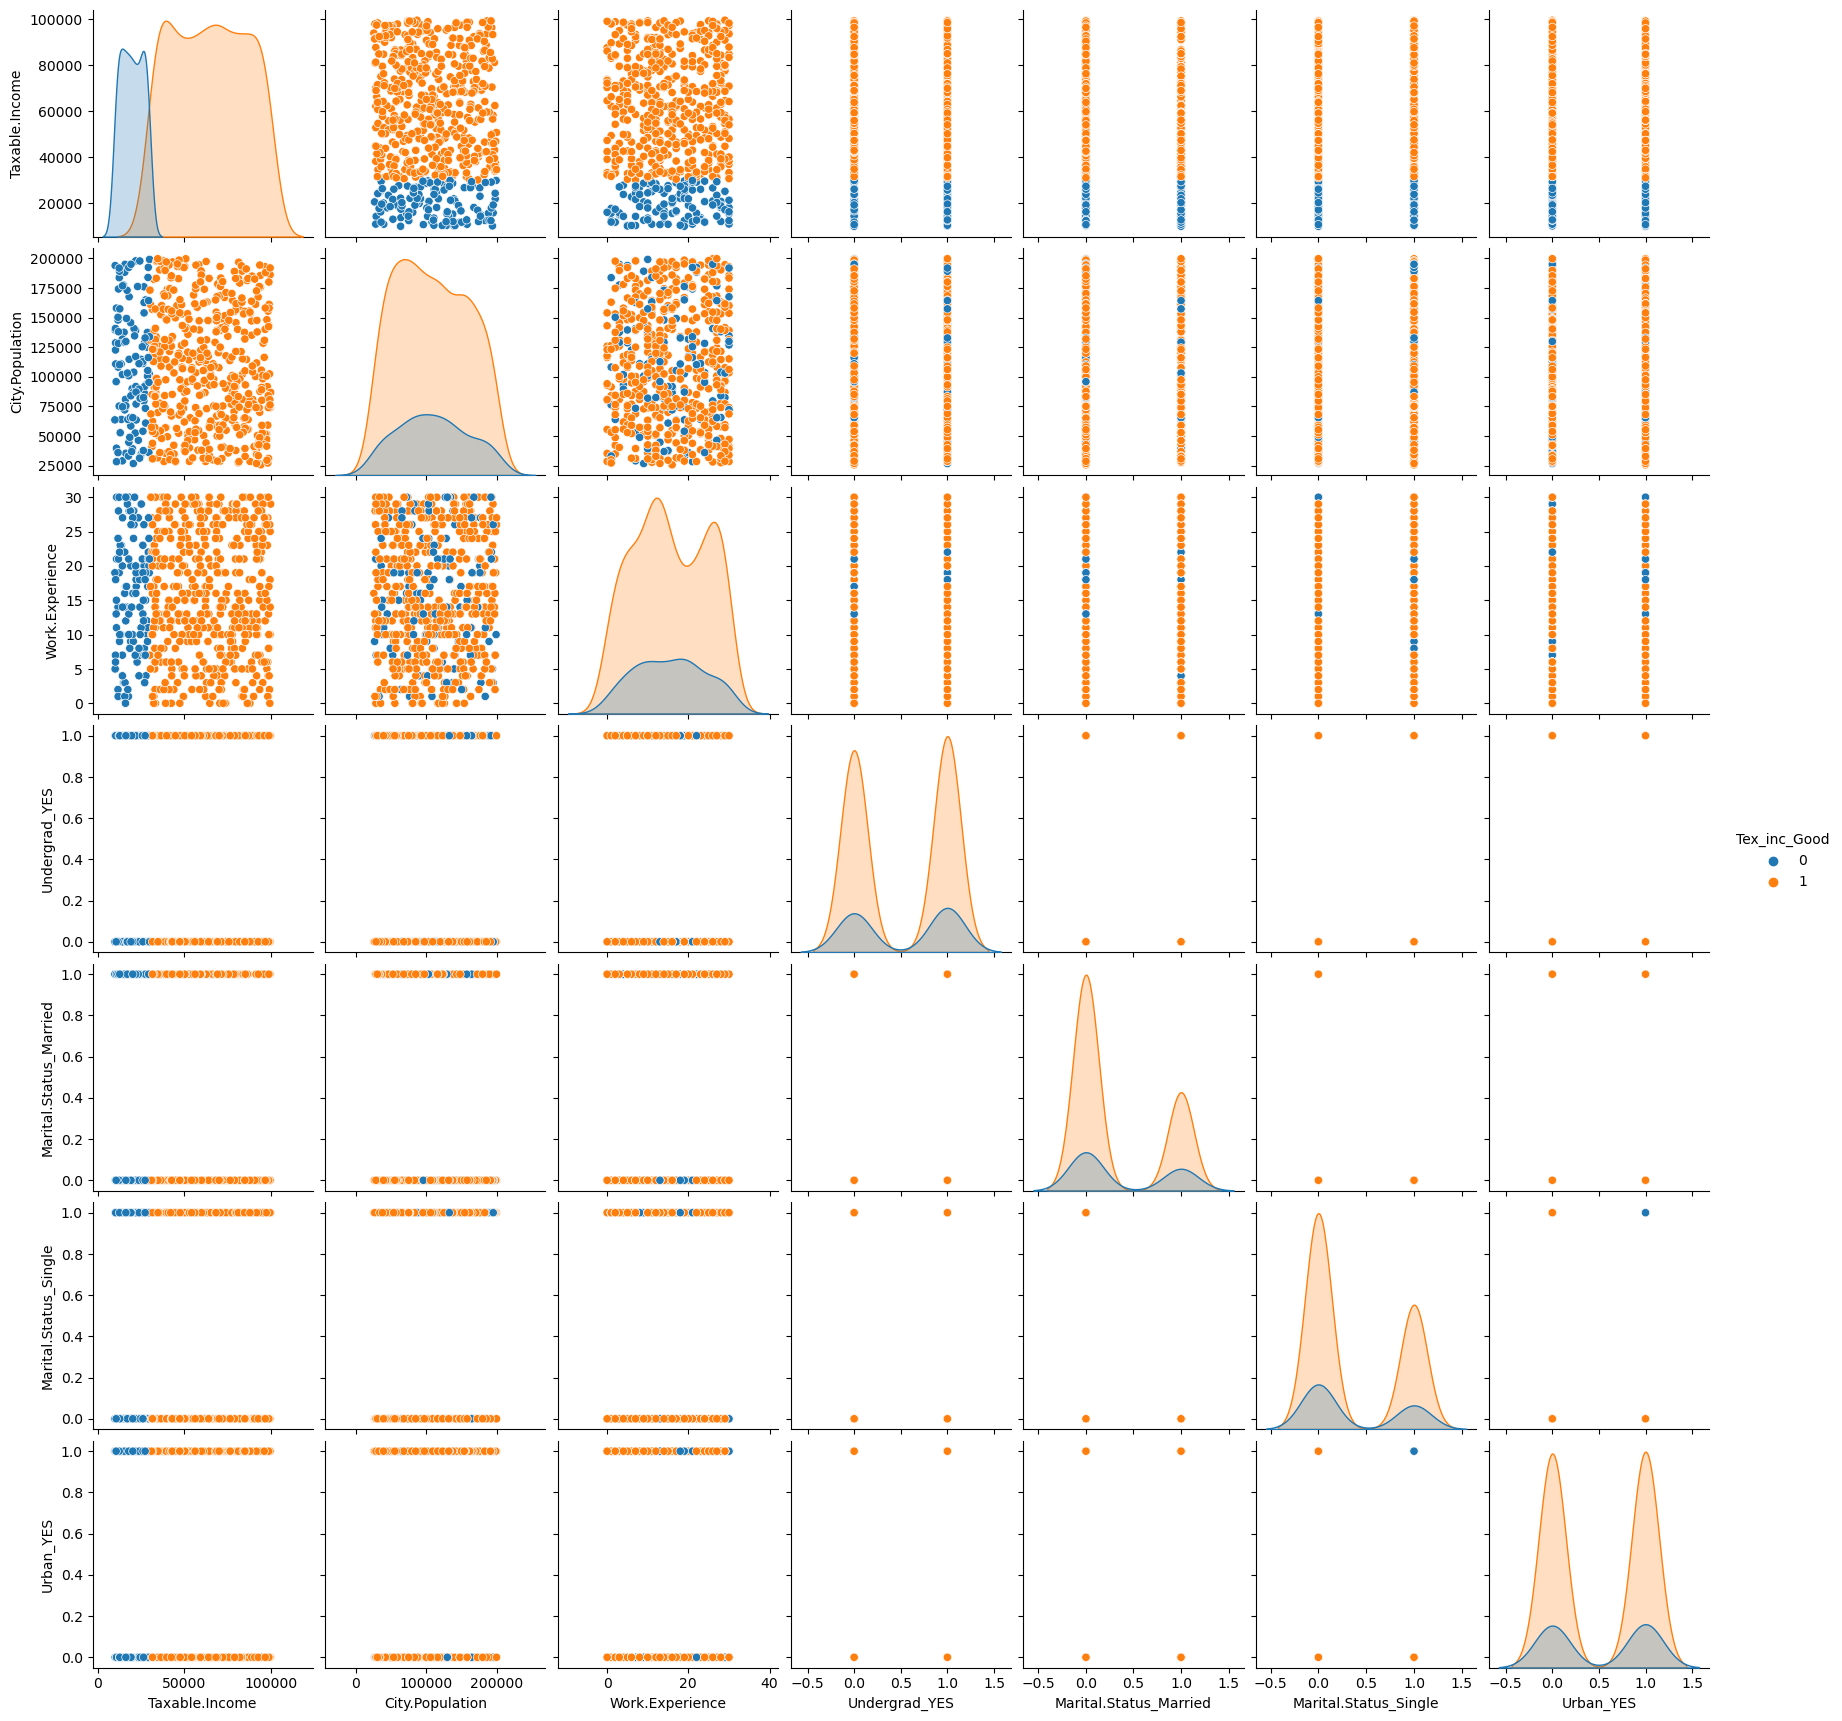

In [14]:
## Pair Plot
sns.pairplot(df,hue='Tex_inc_Good')
plt.show()

## Normalize the numerical features in range 0 and 1 

In [15]:
 # Normalization function 
def func_norm(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [16]:
# Normalized data frame (considering the numerical part of data)
df_norm = func_norm(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tex_inc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


+ Declare the Dependent and Independent column

In [17]:
y = df_norm.iloc[:,-1]
# Selecting the feature 'Tex_inc_Good' as dependent feature
y.head(3)

0    1.0
1    1.0
2    1.0
Name: Tex_inc_Good, dtype: float64

In [18]:
x = df_norm[df_norm.columns.difference(['Tex_inc_Good'])] 
# Selecting all the columns except for 'Tex_inc_Good' as independent features
x.head(3)

,City.Population,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Urban_YES,Work.Experience
0,0.139472,0.0,1.0,0.0,1.0,0.333333
1,0.622394,0.0,0.0,1.0,1.0,0.600000
2,0.772568,1.0,0.0,0.0,1.0,1.000000


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
x_train.head(3)

,City.Population,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Urban_YES,Work.Experience
145,0.986460,0.0,0.0,0.0,1.0,0.066667
9,0.745424,0.0,0.0,1.0,1.0,0.133333
375,0.604348,1.0,0.0,0.0,0.0,0.066667


In [21]:
y_train.head(3)

145    1.0
9      1.0
375    1.0
Name: Tex_inc_Good, dtype: float64

In [22]:
x_test.head(3)

,City.Population,Marital.Status_Married,Marital.Status_Single,Undergrad_YES,Urban_YES,Work.Experience
110,0.038339,0.0,1.0,0.0,1.0,0.633333
419,0.645377,1.0,0.0,0.0,0.0,0.666667
565,0.030374,0.0,0.0,0.0,0.0,0.933333


In [23]:
y_test.head(3)

110    0.0
419    1.0
565    1.0
Name: Tex_inc_Good, dtype: float64

## Model buillding Training and plot

1. Using C5.0 algorithm

In [24]:
model_c5 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_c5.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

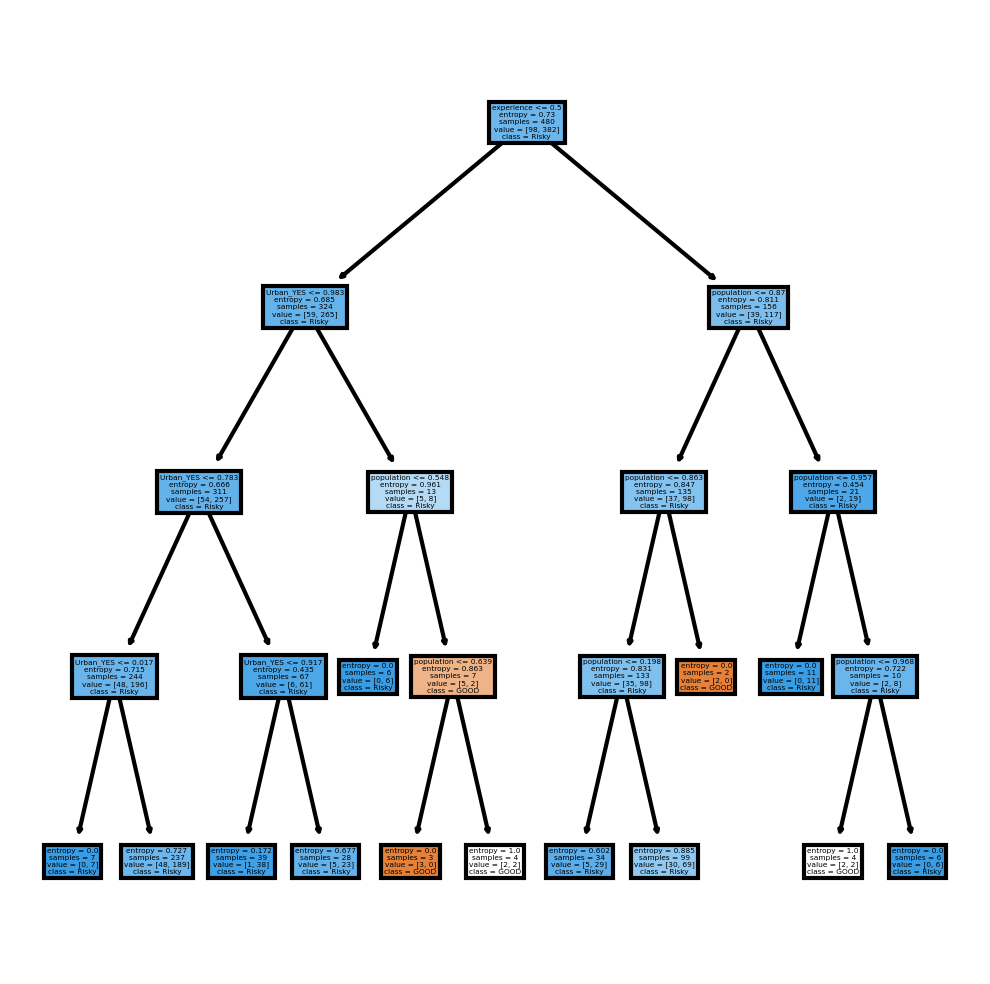

In [25]:
ftr_nm=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
# Feature Name
cl_nm=['GOOD', 'Risky']
# Class name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_c5,
               feature_names = ftr_nm, 
               class_names=cl_nm,
               filled = True)
plt.show()

## Using CART algorithm

In [26]:
model_cart = DecisionTreeClassifier(criterion='gini',
        max_depth=4,
    random_state=42
)
model_cart.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

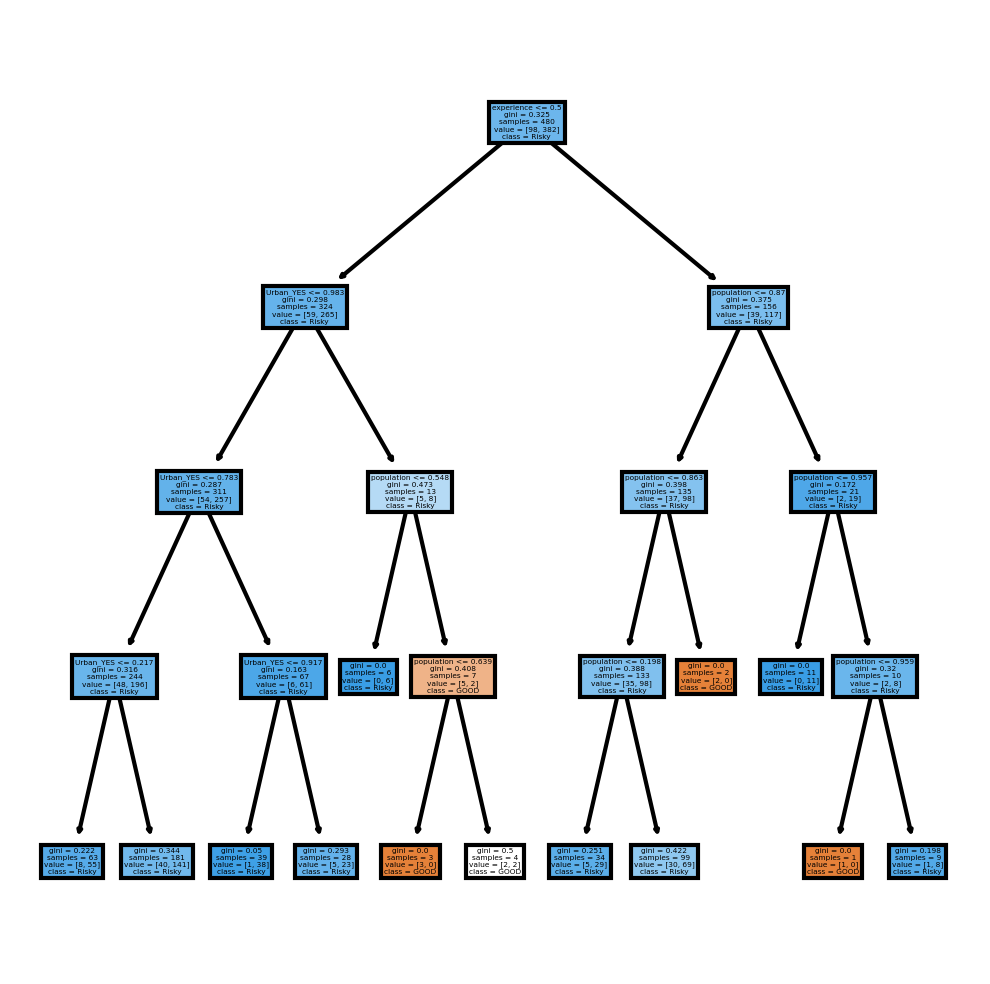

In [27]:
ftr_nm=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
# Feature Name
cl_nm=['GOOD', 'Risky']
# Class name
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_cart,
               feature_names = ftr_nm, 
               class_names=cl_nm,
               filled = True);

In [28]:
model_c5.score(x_test,y_test)

0.775

In [29]:
test_pred = model_c5.predict(x_test)
print(f"The Training accuracy of the model is {model_c5.score(x_train,y_train)}\n")
print(f"The Testing acuuracy of the model is {model_c5.score(x_test,y_test)}\n")
print(pd.crosstab(y_test,test_pred)) ## Actual v/s Predicted classification

The Training accuracy of the model is 0.80625

The Testing acuuracy of the model is 0.775

col_0         0.0  1.0
Tex_inc_Good          
0.0             0   26
1.0             1   93


In [30]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [31]:
model_cart.score(x_test,y_test)

0.775

In [32]:
y_pred_c5 = model_c5.predict(x_test)
y_pred_cart = model_cart.predict(x_test)

In [33]:
test_pred = model_cart.predict(x_test)
print(f"The Training accuracy of the model is {model_cart.score(x_train,y_train)}\n")
print(f"The Testing acuuracy of the model is {model_cart.score(x_test,y_test)}\n")
print(pd.crosstab(y_test,test_pred)) ## Actual v/s Predicted classification

The Training accuracy of the model is 0.8083333333333333

The Testing acuuracy of the model is 0.775

col_0         0.0  1.0
Tex_inc_Good          
0.0             0   26
1.0             1   93


In [34]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        26
         1.0       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



## Same accuracy in classification can be obtained using the C5.0 and CART algorithm 